## I. The Hadamard Test

### Hadmard Gate

If we represent the $|0\rangle$ and $|1\rangle$ states as vectors, we can see that the state $|0\rangle = \begin{pmatrix}1\\0\end{pmatrix}$ showing a $100\%$ chance of measuring $0$ with a $0\%$ chance of measuring 1 and the state $|1\rangle = \begin{pmatrix}0\\1\end{pmatrix}$ showing a $100\%$ probability of measuring $1$ and $0\%$ of measuring $0$. If we do the same with the Hadamard gate we see that $H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$ thus effectively transforming any state into superposition.

Let's look at the affect of applying a Hadamard gate to a state $|0\rangle$:

$$|0\rangle  = \begin{pmatrix}1\\0\end{pmatrix} \qquad \qquad H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$$

$$\xrightarrow{H\otimes I} \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{pmatrix}$$

Moving back into dirac notation we can see the affect of applying the Hadamard gate to the $|0\rangle$ state gives:

$$\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$$

This shows how the Hadmard gate can turn the $|0\rangle$ state into the "plus state" superposition where the magnitude of the probability of measuring $1$ or $0$ is the same and they are both positive. Looking at the affect of the same gate on the $|1\rangle$ state:

$$|1\rangle  = \begin{pmatrix}0\\1\end{pmatrix} \qquad \qquad H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$$
$$\xrightarrow{H\otimes I} \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}0\\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\-1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\-\frac{1}{\sqrt{2}}\end{pmatrix}$$

Again, returning to dirac notation we see that this becomes:

$$\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$$

The gate again transforms the state into superposition but this time brings it to the "minus state" where the magnitude of the probabilities are still the same but they are now a difference instead of a sum. Note that the total probability of each superposition is still $1$:

$$\sqrt{\left(\frac{1}{\sqrt{2}}\right)^{2} + \left(\frac{1}{\sqrt{2}}\right)^{2}} = 1 \qquad \qquad \sqrt{\left(\frac{1}{\sqrt{2}}\right)^{2} + \left(-\frac{1}{\sqrt{2}}\right)^{2}} = 1$$

In [309]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import BackendSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

In [356]:
angle = 0.5625

In [357]:
def recircuit(theta):
    circuit = QuantumCircuit(2,1)
    circuit.x(1)
    circuit.barrier()
    circuit.h(0)
    circuit.cp(2*pi*theta,0,1)
    circuit.h(0)
    circuit.barrier()
    circuit.measure(0,0)
    return circuit

In [358]:
def imcircuit(theta):
    circuit = QuantumCircuit(2,1)
    circuit.x(1)
    circuit.barrier()
    circuit.h(0)
    circuit.s(0)
    circuit.cp(2*pi*theta,0,1)
    circuit.h(0)
    circuit.barrier()
    circuit.measure(0,0)
    return circuit

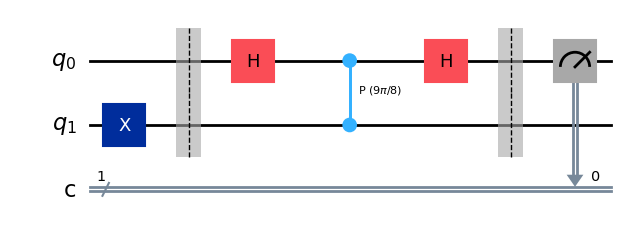

In [369]:
qc = recircuit(angle)
qc.draw("mpl")

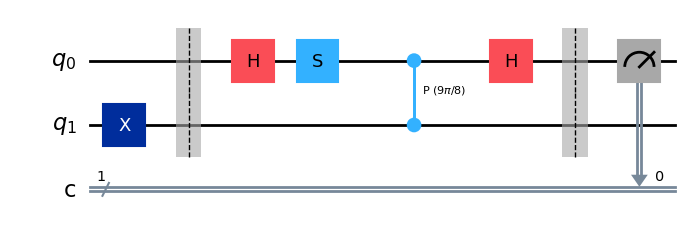

In [370]:
qc2 = imcircuit(angle)
qc2.draw("mpl")

In [371]:
backend = BasicSimulator()

num_of_shots = 10000

result = backend.run(qc, shots=num_of_shots).result()   
counts = result.get_counts()                    

result2 = backend.run(qc2, shots=num_of_shots).result()   
counts2 = result2.get_counts()                

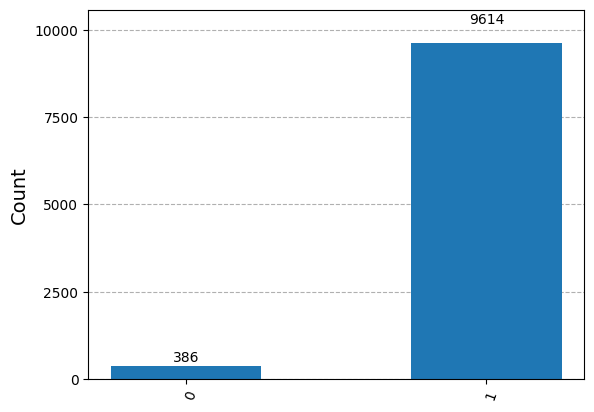

In [372]:
plot_histogram(counts)

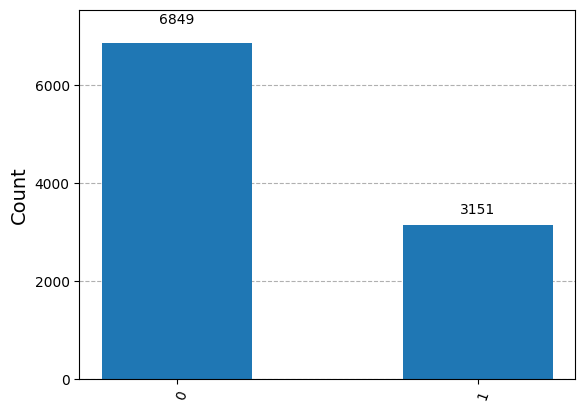

In [373]:
plot_histogram(counts2)

In [374]:
print("Results of the Trial: ", counts)

p0re = counts['0']/num_of_shots
p1re = counts['1']/num_of_shots

p0im = counts2['0']/num_of_shots
p1im = counts2['1']/num_of_shots

re = p0re - p1re
#re = 1 - 2*(p1re)
#re = 2*(p0re) - 1
im = p1im - p0im

#im = 2*(p1im) - 1
#im = 1 - 2*(p0im)

if p1im >= 0.5:
    ans = np.arctan(im/re)/2/pi
elif p1im < 0.5:
    ans = np.arctan(im/re)/2/pi + 0.5

#print("Phi 1: ", phi1, "\nPhi 2: ", phi2)
print("What we got: ", ans)
print("What we want: ", angle)

Results of the Trial:  {'1': 9614, '0': 386}
What we got:  0.5606605479647584
What we want:  0.5625


In [375]:
print('Probability of measuring 1', counts['1']/num_of_shots)
print('Probability of measuring 0', counts['0']/num_of_shots)
print('Calculated probability of measuring 1: ', 0.5*(1 - np.cos(angle*2*pi)))
print('Calculated probability of measuring 0: ',0.5*(1 + np.cos(angle*2*pi)))

Probability of measuring 1 0.9614
Probability of measuring 0 0.0386
Calculated probability of measuring 1:  0.9619397662556435
Calculated probability of measuring 0:  0.038060233744356575


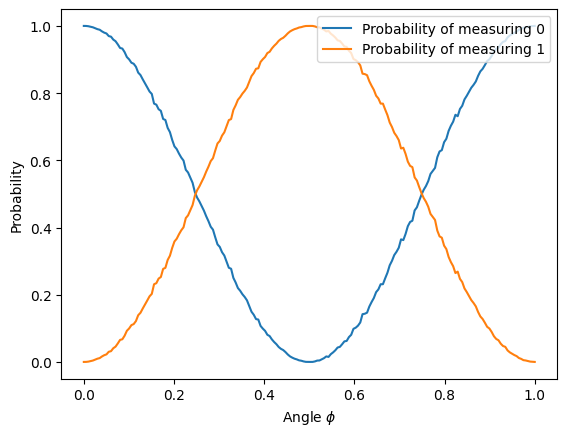

In [376]:
backend = BasicSimulator()

angles = np.linspace(0, 1, 200)
prob0 = []
prob1 = []
expected_phi = angles
for ang in angles:
    circ = recircuit(ang)
    num_of_shots = int(num_of_shots)
    counts = backend.run(circ, shots=num_of_shots).result().get_counts()
    prob0val = counts.get('0')
    prob1val = counts.get('1')
    if prob0val is not None and prob1val is not None:        
        prob0.append(counts['0']/num_of_shots)
        prob1.append(counts['1']/num_of_shots)
    elif prob0val is None:
        prob0.append(0)
        prob1.append(counts['1']/num_of_shots)
    elif prob1val is None:
        prob1.append(0)
        prob0.append(counts['0']/num_of_shots)
plt.plot(angles, prob0, label = 'Probability of measuring 0')
plt.plot(angles, prob1, label = 'Probability of measuring 1')
plt.xlabel('Angle $\phi$')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.show()

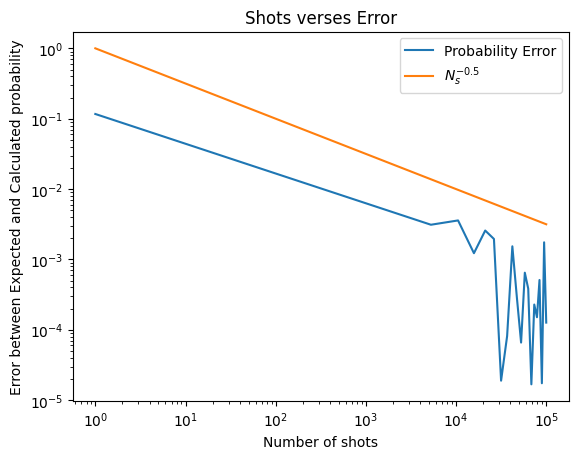

In [377]:
# Construct a graph of error verses number of shots
backend = BasicSimulator()

trials = np.linspace(1, 10**5, 20)
Ns = []
error_diff = []
expected_phi = testing_angle / (2*pi)
for num_of_shots in trials:
    # for some reason python doesn't believe I made it an int
    num_of_shots = int(num_of_shots)
    counts = backend.run(qc, shots=num_of_shots).result().get_counts() 
    counts2 = backend.run(qc2, shots=num_of_shots).result().get_counts() 
    #print(counts)
    if counts.get('0') is not None and counts.get('1') is not None:        
        p0re = counts['0']/num_of_shots
        p1re = counts['1']/num_of_shots
    elif counts.get('0') is None:
        pp0re = 0
        p1re = counts['1']/num_of_shots
    elif counts.get('1') is None:
        p0re = counts['0']/num_of_shots
        p1re = 0

    if counts2.get('0') is not None and counts2.get('1') is not None:        
        p0im = counts2['0']/num_of_shots
        p1im = counts2['1']/num_of_shots
    elif counts2.get('0') is None:
        p0im = 0
        p1im = counts2['1']/num_of_shots
    elif counts2.get('1') is None:
        p0im = counts2['0']/num_of_shots
        p1im = 0
    
    re = p0re - p1re
    im = p1im - p0im
    if p1im >= 0.5:
        ans = np.arctan(im/re)/2/pi
    elif p1im < 0.5:
        ans = np.arctan(im/re)/2/pi + 0.5
    
    error_diff.append((abs(angle - ans))/angle)
    Ns.append(num_of_shots**(-0.5))
    
plt.loglog(trials, error_diff, label = 'Probability Error')
plt.loglog(trials, Ns, label = '$N_s^{-0.5}$')
plt.title("Shots verses Error")
plt.xlabel("Number of shots")
plt.ylabel("Error between Expected and Calculated probability")
plt.legend(loc='upper right')
plt.show()